<a href="https://colab.research.google.com/github/hikaruyaku/KIKAGAKU-/blob/master/3_9_python_%E3%81%A7%E5%AE%9F%E8%A3%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `python` で実装
## `scikit-learn`

In [ ]:
# ライブラリの読込
import sklearn
# version の確認
sklearn.__version__

'0.22.2.post1'

In [ ]:
# データセットの読込
from sklearn.datasets import load_breast_cancer

In [ ]:
# データセットの読込
breast_cancer = load_breast_cancer()

# 入力値と目標値の抽出
x = breast_cancer['data']
t = breast_cancer['target']

In [ ]:
# サイズの確認
x.shape

(569, 30)

In [ ]:
# 0 が悪性，1 が良性
t.shape

(569,)

In [ ]:
type(t)

numpy.ndarray

In [ ]:
type(x)

numpy.ndarray

In [ ]:
# 悪性の人数
(t == 0).sum()

212

In [ ]:
# 良性の人数
(t ==1).sum()

357

## 不均衡データ(imblanced data)

# 訓練データとテストデータに分割

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,t_train,t_test = train_test_split(x,t, train_size=0.7, random_state=0)

In [ ]:
# 入力値/目標値のサイズを確認
print('x_train shape:', x_train.shape)
print('x_test shape :', x_test.shape)
print('t_train shape:', t_train.shape)
print('t_test shape :,', t_train.shape)

x_train shape: (398, 30)
x_test shape : (171, 30)
t_train shape: (398,)
t_test shape :, (398,)


### モデルの訓練とテスト

- `LogisticRegression` ← 改良されている
- `SGDClassifier` ← こちらを用いる

**確立的勾配降下法(SGD: stochastic gradient descent)**

勾配降下法

$$
\begin{aligned}
{\bf w}^{(k+1)} 
&= {\bf w}^{(k)} - \rho \dfrac{\partial}{\partial {\bf w}} L({\bf w}^{(k)}) \\
&= {\bf w}^{(k)} - \rho \sum_{n=1}^{N} \dfrac{\partial L_{n}}{\partial {\bf w}}
\end{aligned}
$$

確立的勾配降下法
$$
{\bf w}^{(k+1)} 
= {\bf w}^{(k)} - \rho \sum_{n=1}^{N} \dfrac{\partial L_{n}}{\partial {\bf w}}
$$

ここで，$N_{b}$ はバッチサイズと呼びます。

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf = SGDClassifier(loss='log', random_state=0)
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
# モデルの訓練
clf.fit(x_train,t_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
# 訓練データに対する正解率(accuracy)の確認
clf.score(x_train,t_train)

0.6683417085427136

In [ ]:
# テストデータに対する正解率(accuracy)の確認
clf.score(x_test,t_test)

0.695906432748538

### データの前処理

標準化：z-score normalization

$$
\tilde{x} = \dfrac{x - \bar{x}}{\sigma}
$$

ここで，$\bar{x}$は平均，$\sigma$は標準偏差です。

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler.mean_

array([1.41855000e+01, 1.91928392e+01, 9.23355025e+01, 6.61859045e+02,
       9.64749497e-02, 1.04080000e-01, 8.87943058e-02, 4.94785528e-02,
       1.80698241e-01, 6.26464573e-02, 4.09096231e-01, 1.20445829e+00,
       2.86661859e+00, 4.13843643e+01, 6.98354020e-03, 2.50993719e-02,
       3.12257678e-02, 1.16784749e-02, 2.04023819e-02, 3.73508116e-03,
       1.63596206e+01, 2.55345226e+01, 1.07736030e+02, 8.94246985e+02,
       1.32529045e-01, 2.53368894e-01, 2.68530796e-01, 1.15221410e-01,
       2.89186935e-01, 8.37181407e-02])

In [ ]:
scaler.var_

array([1.29175157e+01, 1.75159661e+01, 6.11978383e+02, 1.34027359e+05,
       1.93172478e-04, 2.59765595e-03, 6.09266864e-03, 1.53406406e-03,
       7.85206454e-04, 4.69575214e-05, 8.61981370e-02, 3.03909148e-01,
       4.44058298e+00, 2.47685722e+03, 8.16640844e-06, 2.82690187e-04,
       8.14560621e-04, 3.42804953e-05, 6.67639347e-05, 6.93955438e-06,
       2.45909719e+01, 3.76963891e+01, 1.18455243e+03, 3.56531201e+05,
       5.27186175e-04, 2.35498499e-02, 3.72515370e-02, 4.30408790e-03,
       4.01445370e-03, 3.21651393e-04])

In [ ]:
# z-score normalization
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [ ]:
x_train_norm.mean(axis=0)

array([-2.26033597e-15, -1.38917353e-16,  2.35657390e-15, -6.37680863e-16,
       -1.38219977e-15,  1.27393210e-16,  1.33129130e-15,  5.70035365e-16,
       -3.81436926e-15, -1.68081629e-15, -2.55239715e-16,  2.64445082e-16,
       -4.59989389e-16,  2.78950509e-17,  2.15684533e-15,  5.95140910e-16,
        4.56641983e-16,  3.30416878e-16, -1.38917353e-16,  1.17466059e-15,
        1.02346942e-15, -6.34333457e-16, -1.92699011e-15, -1.60675493e-16,
        3.58311928e-15, -8.60614623e-16, -2.94571737e-16, -6.33217655e-17,
       -5.45069294e-16,  3.86883434e-15])

In [ ]:
x_train_norm.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# 前処理後のデータで訓練
clf = SGDClassifier(loss='log', random_state=0)
clf.fit(x_train_norm,t_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
# 訓練データに対して正解率(accuracy) を確認
clf.score(x_train_norm,t_train)

0.9698492462311558

In [ ]:
# テストデータに対して正解率 (accuracy) を確認
clf.score(x_test_norm,t_test)

0.9590643274853801

### ハイパーパラメーターの最適化
学習係数 (learning rate)

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# 探索するハイパーパラメータの範囲を定義
param_grid = [{
    'loss' : ['log'],
    'learning_rate':['constant'],
    'eta0':[1e-5,1e-4,1e-3,1e-2,1e-1],
    'random_state':[0]
}]

In [ ]:
clf_cv = GridSearchCV(estimator=SGDClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
clf_cv

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'eta0': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                          'learning_rate': ['constant'], 'loss': ['log'],
                          'random_state': [0]}],
             pre_

In [ ]:
# 定義したハイパーパラメータの組み合わせでモデルの訓練
clf_cv.fit(x_train_norm,t_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'eta0': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                          'learning_rate': ['constant'], 'loss': ['log'],
                          'random_state': [0]}],
             pre_

In [ ]:
# 候補の中で最も正解率が高かった値
clf_cv.best_score_

0.9799367088607596

In [ ]:
# 正解率が最も高かったハイパーパラメーターの組合せ
clf_cv.best_params_

{'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'log', 'random_state': 0}

In [ ]:
# 最も正解率が高かった訓練済みモデルを抽出
clf_best = clf_cv.best_estimator_
clf_best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# 訓練データに対する正解率
clf_best.score(x_train_norm,t_train)

0.9874371859296482

In [ ]:
# テストデータに対する正解率
clf_best.score(x_test_norm,t_test)

0.9766081871345029

### 評価指標

- 正解率 (accuracy)
- precision
- Recall
- …

In [ ]:
from sklearn.metrics import  confusion_matrix

In [ ]:
# 混同行列
y_test = clf_best.predict(x_test_norm)
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
# 混同行列の算出
cmat = confusion_matrix(t_test,y_test)
cmat

array([[ 60,   3],
       [  1, 107]])

In [ ]:
import seaborn as sns

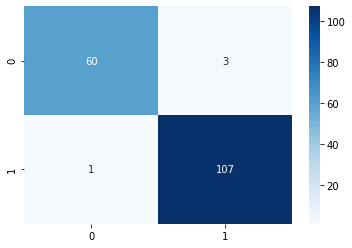

In [ ]:
sns.heatmap(cmat,annot=True,fmt='',cmap='Blues')

In [ ]:
import numpy as np

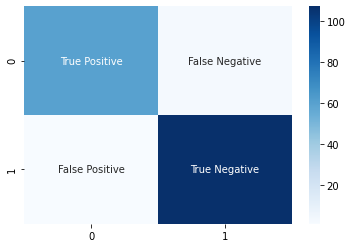

In [ ]:
labels = ['True Positive', 'False Negative','False Positive', 'True Negative']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmat,annot=labels,fmt='',cmap='Blues')